In [2]:
!pip install pandas numpy matplotlib seaborn lightgbm

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 5.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 4.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 3.9 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.0 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 4.0 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.0 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 4.0 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 3.9 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 3.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 3.8 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 3.8 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots
sns.set_style('whitegrid')

# --- Load Your Dataset ---

# Define the file path
file_path = 'House_Rent_Dataset.csv'

# Read the CSV file into a pandas DataFrame
# We'll call our DataFrame 'df'
try:
    df = pd.read_csv(file_path)
    
    # --- Initial Inspection (Very Important!) ---
    
    # 1. Print the first 5 rows to see what the data looks like
    print("--- First 5 Rows ---")
    display(df.head())
    
    # 2. Print a summary of all columns, their data types, and any missing values
    print("\n--- Data Info (Types & Missing Values) ---")
    df.info()
    
    # 3. Print basic statistics for numerical columns (like mean, min, max)
    print("\n--- Numerical Statistics ---")
    display(df.describe())
    
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the file is in the same directory as your notebook, or provide the full path.")

--- First 5 Rows ---


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner



--- Data Info (Types & Missing Values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB

--- Numerical Statistics ---


,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Removed 0 duplicate rows.
Removed 91 rows with unrealistic 'Size' (< 100 sq ft).

--- Plotting Distributions ---


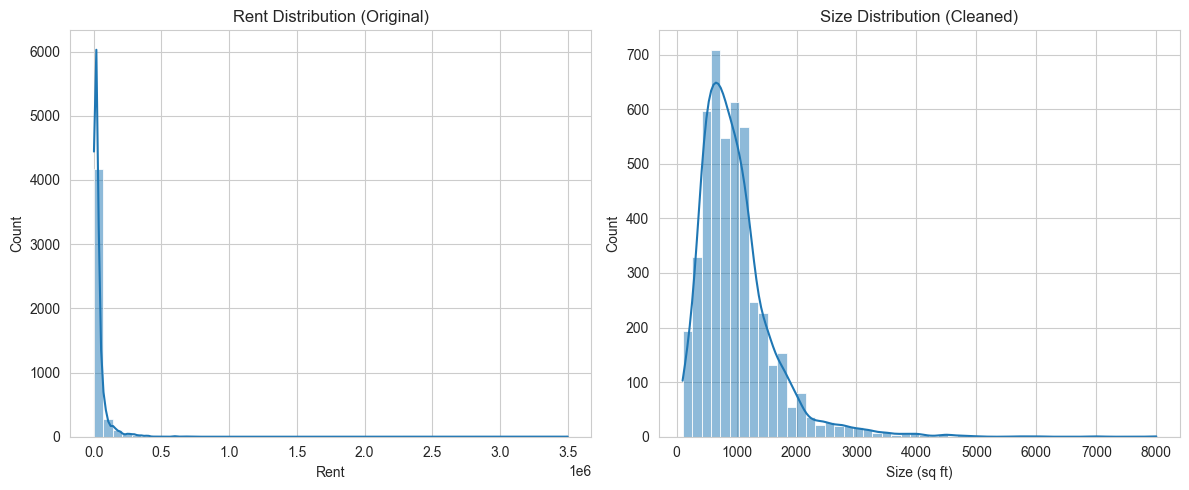


--- Top 5 Most Common Cities ---
City
Mumbai       972
Chennai      890
Bangalore    885
Hyderabad    857
Delhi        529
Name: count, dtype: int64

--- Furnishing Status Counts ---
Furnishing Status
Semi-Furnished    2212
Unfurnished       1774
Furnished          669
Name: count, dtype: int64


In [4]:
# 1. Check for and remove duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - len(df)} duplicate rows.")

# 2. Handle outliers in 'Size'
# We'll remove rows where size is less than 100 sq ft, as this is unrealistic.
initial_rows = len(df)
df = df[df['Size'] >= 100]
print(f"Removed {initial_rows - len(df)} rows with unrealistic 'Size' (< 100 sq ft).")

# 3. Analyze Distributions
print("\n--- Plotting Distributions ---")
plt.figure(figsize=(12, 5))

# Plot for Rent
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st plot)
sns.histplot(df['Rent'], kde=True, bins=50)
plt.title('Rent Distribution (Original)')
plt.xlabel('Rent')

# Plot for Size
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd plot)
sns.histplot(df['Size'], kde=True, bins=50)
plt.title('Size Distribution (Cleaned)')
plt.xlabel('Size (sq ft)')

plt.tight_layout() # Prevents plots from overlapping
plt.show()

# --- Analyze Categorical Data ---
print("\n--- Top 5 Most Common Cities ---")
print(df['City'].value_counts().head(5))

print("\n--- Furnishing Status Counts ---")
print(df['Furnishing Status'].value_counts())

In [5]:
# --- 1. Engineer the 'Floor' column ---

# This function will parse the string like "1 out of 3" or "Ground out of 4"
def process_floor(floor_str):
    # Handle missing data just in case
    if pd.isna(floor_str):
        return np.nan, np.nan
    
    parts = floor_str.split(' out of ')
    floor_num = np.nan
    total_floors = np.nan
    
    # Part 2: Get total_floors
    if len(parts) == 2:
        try:
            total_floors = int(parts[1])
        except ValueError:
            # Catches cases like 'Ground out of Upp'
            total_floors = np.nan 
    
    # Part 1: Get floor_num
    floor_val = parts[0].lower().strip()
    if 'ground' in floor_val:
        floor_num = 0
    elif 'upper basement' in floor_val:
        floor_num = -1
    elif 'lower basement' in floor_val:
        floor_num = -2
    else:
        try:
            floor_num = int(floor_val)
        except ValueError:
            # Catches cases where floor is not a number and not 'ground'
            floor_num = np.nan
            
    return floor_num, total_floors

# Apply the function to the 'Floor' column to create two new columns
df[['Floor_Num', 'Total_Floors']] = df['Floor'].apply(lambda x: pd.Series(process_floor(x)))

# --- Clean up the new 'Floor' features ---

# Fill any missing 'Total_Floors' with the median value (a good guess)
median_total_floors = df['Total_Floors'].median()
df['Total_Floors'] = df['Total_Floors'].fillna(median_total_floors)

# Fill any missing 'Floor_Num' with the median value
median_floor_num = df['Floor_Num'].median()
df['Floor_Num'] = df['Floor_Num'].fillna(median_floor_num)

# --- 2. Create more 'Floor' features for the model ---
# These binary features often help the model
df['Is_Top_Floor'] = (df['Floor_Num'] == df['Total_Floors']).astype(int)
df['Is_Ground_Floor'] = (df['Floor_Num'] == 0).astype(int)


# --- 3. Log Transform the 'Rent' column ---
df['Rent_Log'] = np.log1p(df['Rent'])

# --- 4. Display the results ---
print("Feature Engineering Complete.")
print(f"Median Total Floors (used for filling missing): {median_total_floors}")
print(f"Median Floor Num (used for filling missing): {median_floor_num}")

# Show the first 5 rows with our new columns
print("\n--- DataFrame with New Features ---")
display(df.head())

Feature Engineering Complete.
Median Total Floors (used for filling missing): 4.0
Median Floor Num (used for filling missing): 2.0

--- DataFrame with New Features ---


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_Num,Total_Floors,Is_Top_Floor,Is_Ground_Floor,Rent_Log
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,2.0,0,1,9.210440
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1.0,3.0,0,0,9.903538
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1.0,3.0,0,0,9.741027
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1.0,2.0,0,0,9.210440
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1.0,2.0,0,0,8.922792


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 1. Define Feature (X) and Target (y) ---

# Drop the columns we won't use
# - Rent: We use Rent_Log now
# - Posted On, Point of Contact: Not very predictive without complex engineering
# - Area Locality: Too many unique values, we'll drop it for this model
# - Floor: We've replaced it with our new floor features
df_model = df.drop(['Rent', 'Posted On', 'Floor', 'Area Locality', 'Point of Contact'], axis=1)

# Define which columns are numerical and which are categorical
numerical_features = [
    'BHK', 'Size', 'Bathroom', 'Floor_Num', 'Total_Floors', 
    'Is_Top_Floor', 'Is_Ground_Floor'
]

categorical_features = [
    'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred'
]

# Our features (X) are all columns except our target (Rent_Log)
X = df_model.drop('Rent_Log', axis=1)

# Our target (y) is the Rent_Log column
y = df_model['Rent_Log']


# --- 2. Split the Data into Training and Testing Sets ---
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total rows in dataset: {len(df_model)}")
print(f"Rows in Training Set (X_train): {len(X_train)}")
print(f"Rows in Testing Set (X_test): {len(X_test)}")


# --- 3. Create the Preprocessing Pipeline ---

# Create a transformer for numerical features: It will apply StandardScaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features: It will apply OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply the correct transformer to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("\n--- Preprocessing pipeline created successfully. ---")

Total rows in dataset: 4655
Rows in Training Set (X_train): 3724
Rows in Testing Set (X_test): 931

--- Preprocessing pipeline created successfully. ---


In [7]:
# Import the models we want to train
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

# --- Model 1: Linear Regression (Our Baseline) ---
# This is a simple model that gives us a starting score.
print("Starting training for: 1. Linear Regression...")

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the Linear Regression model
lr_pipeline.fit(X_train, y_train)
print("...Linear Regression training complete.")


# --- Model 2: Random Forest (A Powerful Model) ---
# This is a much more advanced model that's great for this type of data.
# n_jobs=-1 tells it to use all your computer's processors to train faster.
print("\nStarting training for: 2. Random Forest...")

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)
print("...Random Forest training complete.")


# --- Model 3: LightGBM (Best Chance for 90% Accuracy) ---
# This is a "gradient boosting" model, often the winner in data science.
print("\nStarting training for: 3. LightGBM...")

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgb.LGBMRegressor(random_state=42, n_jobs=-1))
])

# Train the LightGBM model
lgbm_pipeline.fit(X_train, y_train)
print("...LightGBM training complete.")

print("\n--- ALL MODELS TRAINED SUCCESSFULLY! ---")

Starting training for: 1. Linear Regression...
...Linear Regression training complete.

Starting training for: 2. Random Forest...
...Random Forest training complete.

Starting training for: 3. LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 3724, number of used features: 21
[LightGBM] [Info] Start training from score 9.894105
...LightGBM training complete.

--- ALL MODELS TRAINED SUCCESSFULLY! ---


In [8]:
from sklearn.metrics import r2_score, mean_absolute_error

# A function to evaluate our models
def evaluate_model(model_pipeline, model_name):
    print(f"--- Results for {model_name} ---")
    
    # Make predictions on the test set
    y_pred_log = model_pipeline.predict(X_test)
    
    # --- 1. R-squared (Accuracy) ---
    # We calculate this on the log-transformed values, as that's what the model trained on.
    # This is the "model accuracy" you were looking for.
    r2_log = r2_score(y_test, y_pred_log)
    print(f"R-squared (Accuracy): {r2_log:.4f}")
    
    # --- 2. Mean Absolute Error (in Rupees) ---
    # We must reverse the log-transform using np.expm1() to get actual Rupees.
    # This tells us, on average, how many Rupees our prediction was off by.
    y_test_actual = np.expm1(y_test)
    y_pred_actual = np.expm1(y_pred_log)
    
    mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
    print(f"Mean Absolute Error:  On average, the prediction is off by ₹{mae_actual:,.2f}")
    print("\n")

# --- Run the evaluation for all three models ---
evaluate_model(lr_pipeline, "Linear Regression")
evaluate_model(rf_pipeline, "Random Forest")
evaluate_model(lgbm_pipeline, "LightGBM")

--- Results for Linear Regression ---
R-squared (Accuracy): 0.8217
Mean Absolute Error:  On average, the prediction is off by ₹12,626.26


--- Results for Random Forest ---
R-squared (Accuracy): 0.8285
Mean Absolute Error:  On average, the prediction is off by ₹11,776.91


--- Results for LightGBM ---
R-squared (Accuracy): 0.8505
Mean Absolute Error:  On average, the prediction is off by ₹11,158.94




D:\python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [9]:
# First, you'll need to install this library
!pip install category_encoders

import category_encoders as ce

# --- Create a NEW preprocessor using Target Encoding ---

# Define our features again, this time ADDING Area Locality
numerical_features = [
    'BHK', 'Size', 'Bathroom', 'Floor_Num', 'Total_Floors', 
    'Is_Top_Floor', 'Is_Ground_Floor'
]

# We will one-hot encode these
onehot_features = [
    'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred'
]

# We will target-encode this one
target_encode_features = ['Area Locality']


# --- Create the new transformer pipelines ---

# 1. Numeric Transformer (same as before)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. One-Hot Transformer (same as before)
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. NEW: Target Encoder Transformer
# We'll use the TargetEncoder from the new library
target_transformer = Pipeline(steps=[
    ('target', ce.TargetEncoder(handle_unknown='value'))
])

# --- Combine them in the NEW ColumnTransformer ---
preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat_onehot', onehot_transformer, onehot_features),
        ('cat_target', target_transformer, target_encode_features)
    ])

print("--- New 'preprocessor_v2' created with Target Encoding. ---")


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.2 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/9.6 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.6 MB 768.8 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.6 MB 768.8 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.6 MB 814.1 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.6 MB 867.2 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.6 MB 849.2 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.6 MB 890.8 kB/s eta 0:00:09
   -------- ------------------------------- 2.1/9.6 MB 963.7 kB/s eta 0:00:08
   ---------- ----------------------------- 2.6/9.6 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.6 MB 1.1 MB/s eta 0:00:07
   ---------

In [13]:
print("--- Creating a 'Top 50' Locality Feature ---")

# 'df' is our original, full dataframe from the beginning
# We first find the 50 most common localities
top_50_localities = df['Area Locality'].value_counts().head(50).index.tolist()

# Now, we create a new column.
# If a locality is in our top 50, we use its name.
# If it's a rare one, we just call it 'Other'.
df['Area_Locality_Simple'] = df['Area Locality'].apply(lambda x: x if x in top_50_localities else 'Other')

print("New 'Area_Locality_Simple' column created.")
print("\n--- Value Counts for New Feature: ---")
display(df['Area_Locality_Simple'].value_counts())


# --- Re-split the data with this new feature ---
# We need to re-make X_train and X_test to include this.

numerical_features = [
    'BHK', 'Size', 'Bathroom', 'Floor_Num', 'Total_Floors', 
    'Is_Top_Floor', 'Is_Ground_Floor'
]

# Add our new feature to the list of categorical features
categorical_features_v3 = [
    'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 
    'Area_Locality_Simple'  # <-- Our new, safer feature
]

all_features = numerical_features + categorical_features_v3

# 'df' is our main DataFrame
X = df[all_features]
y = df['Rent_Log']

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Re-created X_train and X_test successfully. ---")
print(f"New X_train shape: {X_train.shape}")

--- Creating a 'Top 50' Locality Feature ---
New 'Area_Locality_Simple' column created.

--- Value Counts for New Feature: ---


Area_Locality_Simple
Other                                       3906
Bandra West                                   37
Gachibowli                                    29
Electronic City                               24
Velachery                                     22
Miyapur, NH 9                                 22
Madipakkam                                    20
K R Puram                                     19
Chembur                                       19
Kondapur                                      18
Laxmi Nagar                                   18
Medavakkam                                    17
Iyyappanthangal                               17
Banjara Hills, NH 9                           17
Salt Lake City Sector 2                       16
Sholinganallur                                16
Chromepet, GST Road                           15
Vadapalani                                    15
Andheri West                                  15
Attapur                                       14


--- Re-created X_train and X_test successfully. ---
New X_train shape: (3724, 12)


In [14]:
# --- Create the Preprocessing Pipeline (v3) ---

# 1. Numeric Transformer (same as before)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. Categorical Transformer (using our new v3 list)
categorical_transformer_v3 = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. Combine in ColumnTransformer (v3)
preprocessor_v3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer_v3, categorical_features_v3)
    ])

print("--- New 'preprocessor_v3' created successfully. ---")

--- New 'preprocessor_v3' created successfully. ---


In [15]:
# --- Model 3 (LightGBM) with V3 Preprocessor ---
print("\nStarting training for: LightGBM v3 (with 'Top 50' Localities)...")

# We'll use the original, simple LGBM model that worked well
lgbm_pipeline_v3 = Pipeline(steps=[
    ('preprocessor', preprocessor_v3),
    ('regressor', lgb.LGBMRegressor(random_state=42, n_jobs=-1))
])

# Train the LightGBM model
lgbm_pipeline_v3.fit(X_train, y_train)
print("...LightGBM v3 training complete.")

# --- Evaluate the new V3 model ---
# This uses the 'evaluate_model' function we defined earlier
print("\n")
evaluate_model(lgbm_pipeline_v3, "LightGBM v3 (Top 50 Localities)")


Starting training for: LightGBM v3 (with 'Top 50' Localities)...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 3724, number of used features: 24
[LightGBM] [Info] Start training from score 9.894105
...LightGBM v3 training complete.


--- Results for LightGBM v3 (Top 50 Localities) ---
R-squared (Accuracy): 0.8544
Mean Absolute Error:  On average, the prediction is off by ₹10,797.77




D:\python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
